In [1]:
from utils.DataManager import DataManager
from sklearn.linear_model import LogisticRegression
from utils.CrossValidation import CrossValidation
from utils.Sampling import sampling_SMOTE
from utils.Metrics import calculate_metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data_manager = DataManager(r'C:\Users\vnaza\OneDrive\Documentos\Projetos\ClassifierCompetition\data\Train.xlsx')

In [3]:
df = data_manager.get_original_df()

Class
0    99.785059
1     0.214941
Name: proportion, dtype: float64


In [4]:
X_train, X_test, y_train, y_test = data_manager.train_test_splits(0.7)

data_manager.get_class_propotion(y_train)

Class
0    99.785145
1     0.214855
Name: proportion, dtype: float64

In [5]:
X_train_sampled, y_train_sampled = sampling_SMOTE(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
LogisticRegression(C=1, class_weight={0: 1, 1: 1}, fit_intercept=False,
                   random_state=0)


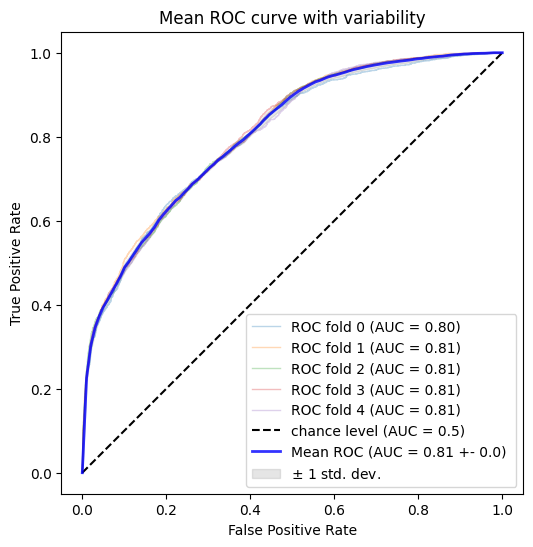

In [13]:
logit = LogisticRegression(random_state=0, C=1)
cross_validation = CrossValidation(X_train_sampled, y_train_sampled, model=logit, n_splits=5)

params = [{
    # 'C': np.linspace(0, 10, 11),
    'class_weight': [{0:0.1, 1:0.9}, {0: 0.05, 1: 0.95}, {0: 0.01, 1: 0.99}, {0:1,1:10}, {0:1,1:100}, {0:1, 1:1}],
    'fit_intercept': [True,False]
}]

best_logit, best_params = cross_validation.grid_search(params=params, scoring='balanced_accuracy')

logit = LogisticRegression().set_params(**best_params)
cross_validation.roc_cv_visualization(model=logit)

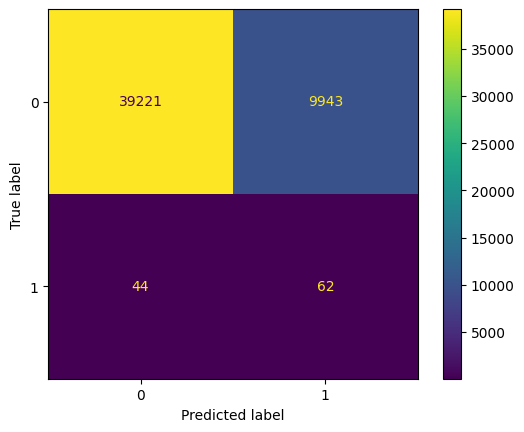

Classification Report for Unbalanced Series: 
                    pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.80      0.58      0.89      0.68      0.48     49164
          1       0.01      0.58      0.80      0.01      0.68      0.46       106

avg / total       1.00      0.80      0.59      0.89      0.68      0.48     49270

Balanced Accuracy Score: 0.6913320914367469
Matthews Correlation Coefficient: 0.04407405453385735
ROC AUC Score: 0.757930235039291


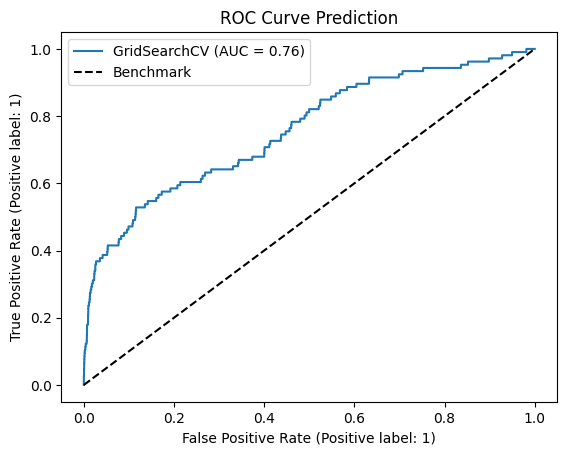

In [14]:
yhat = best_logit.predict(X_test)
calculate_metrics(X_test, y_test, yhat, model=best_logit)
